# ASTR 310 HW 2

©2024 LYoung, UIUC

For this assignment, your solutions should consist of a PDF file listing
your answers and program code and showing your interaction with your
program. Please follow the template below; clean up your code so that it
runs straight through from the beginning and does not include extraneous
material. In other words, if you try some code and it doesn’t work,
delete the bad code or at the very least comment it out so that the TA
knows not to grade it. Otherwise you may find unexpected points taken
off. Use Jupyter’s export function to create a PDF file and submit that.
If you don’t have LaTeX installed (what are you waiting for?) you may
have to create a html file and use your browser’s print functionality to
convert the html into a PDF.

### 1.  Python code fragments, part 1
State in words what each of these Python code fragments does. As
        a reminder, you should do this yourself without using a code
        explainer or other AI tool. Feel free to execute the code and
        see what it does. [10 pts; 2 each]

**a.)** 

`x_comp = 34.897`  
`y_comp = x_comp**2 + 12.`  
`print("x_comp = ", x_comp, " y_comp = ", y_comp)`

This code performs a calculation, taking `x_comp` as an input, squaring it and adding 12 and storing the result as `y_comp`, and then printing the results

**b.)**

`tmp = A`  
`A = B`  
`B = tmp`

This code swaps the variables `A` and `B`

**c.)**

`from cmath import log`  
`z = -4 + 2j`  
`print((log(z)).imag)`

This code creates a complex number `z`, then takes the natural log of `z` and prints out the imaginary component.

**d.)**

`q = s = 3.3`  
`q = s * q`

This code assigns `q` and `s` the value 3.3. Then it reassigns `q` to `s` $*$ `q`.

**e.)**

`s = float(input("enter a value: "))`  
`print((s % 2) == 1) `

This code takes an input and casts it to a float and assigns it to `s`. Then it prints out whether or not `s` is an odd number.

### 2.  Python code fragments, part 2

Explain why each of the following broken Python statements is broken. Again, don’t use a code explainer or other AI tool. Feel free to try executing the code and see what happens, but your answer will need more detail than just repeating the error messages.  You'll have to give enough specifics that your reader will know how to fix the code. [10 pts; 2 each]

**a.)** `R = ((x-3.231)**2 + (y-7.325))**2)**0.5`

There are 2 problems with this code. One is that there is an extra unmatched parenthesis after `**2`, and the other is that the variables `x` and `y` were never defined. To fix it, remove the parenthesis and define `x` and `y`.

**b.)** `print("the result is " + 17.1)`

The problem with this code is that you cannot concatenate a float to a string, i.e. you cannot add together a string and a float. To fix it, convert 17.1 to a string first.

**c.)** `result#2 = 6.4*sin(13.8*pi*omega) - 4.8`

There are 3 problems with this code. You cannot include a `#` in a variable name, this symbol will turn everything after it into a comment. The `sin` function doesn't work because it was not imported, and the variable `omega` was not defined. To fix these problems, remove the `#`, import `math.sin`, and define `omega`.

**d.)** 

`for i in range(13):`\
`   j = i**2 + 1`\
`    print(i, j)`

This code is not indented properly, `j = i**2 + 1` should be indented, and it is unclear whether or not the following line should also be indented, although it probably should be.

**e.)** `length_in_inches = 2.54 * input("enter length in cm: ")`

This code does not work because the `input` function returns a string, and you cannot multiply by a string. To fix it, cast the input to an int.

### 3.  Writing a Python program that works with user input and calculates something

In Big Bang cosmology the expansion of the Universe changes the
relationship between the apparent angular size of a distant object
and its real physical size. Normally in a non-expanding spacetime, a
distant object of physical size $L$ at a distance $d$ subtends an
angle $\theta \approx L/d$ (in radians; approximate because of the
small angle approximation). In an expanding universe this
relationship does not hold, but we can define a quantity called the
“angular diameter distance" $d_A$ such that $$\theta = L/d_A$$ or
$L = d_A\; \theta$. The angular diameter distance is a function of
cosmological parameters such as the rate of expansion and the matter
content of the Universe as well as the redshift (a measure of the
amount that the wavelength of light gets stretched out by the
expansion). In this problem we’ll fix the value of
$\theta$ = $1^{\prime\prime}$, so $d_A$ can be thought of as a
conversion factor between angle in arcseconds ($^{\prime\prime}$)
and size in kiloparsecs (kpc = $3.0857\times 10^{21}$ cm).

**a.)** Write a Python program that obtains from the user the value of
        the Hubble constant (units $km s^{-1}$ $Mpc^{-1}$), the matter
        density parameter $\Omega_m$ (dimensionless), and a redshift $z$
        (also dimensionless). Your code should then compute and print
        the conversion between arcseconds and kpc, i.e. the angular
        diameter distance, for a flat cosmology at this redshift. Have
        your program print the result with a friendly message such as
        “The conversion factor is X.XXX kpc/arcsec."

Use vanilla Python for this problem, no fancy stuff like
astropy.units. (We’ll get to that before long.)

An approximate analytical fit to the angular diameter distance
for a flat cosmology is given by
[Pen, U.-L. (1999, ApJS, 120, 49)](https://ui.adsabs.harvard.edu/abs/1999ApJS..120...49P/abstract):

$$d_A = \frac{1}{1+z} \frac{c}{H_0} \biggl[ \eta(1,\Omega_m) - \eta\biggr(\frac{1}{1+z}, \Omega_m \biggr) \biggr]$$

where

$$\eta(a, \Omega_m) \equiv 2\sqrt{s^3+1} \biggr( \frac{1}{a^4} - 0.1540\frac{s}{a^3} + 0.4304\frac{s^2}{a^2} + 
        0.19097\frac{s^3}{a} + 0.066941s^4 \biggr) ^{-1/8} \mathrm{and} $$
$$s^3 \equiv \frac{1-\Omega_m}{\Omega_m}.$$

Watch the unit conversions. Recall that $c$ has units of
length/time and $H_0$ has units of 1/time, so $d_A$ will come
out with native units of length/radian and you can convert that
to kpc/arcsec using the definition of a radian. [10 pts]

In [90]:
from scipy import constants as const
import math


def conversion_factor(H, m, z):

    H = H * 3.24078e-20 # convert to 1/s


    def n(a, o):
        s = ((1 - o) / o) ** (1/3)
        return 2 * math.sqrt(s**3 + 1) * ((1/a**4) - (0.1540 * s/a**3) + (0.4304*s**2/a**2) + (0.19097*s**3/a) + (0.066941*s**4))**(-1/8)


    da = 1/(1+z) * (2.998e8 / H) * (n(1,m) - n((1/(1+z)),m))
    da # m/radian

    factor = da / 206265 / 3.086e+19 # convert to kpc/arcsecond
    print(f"The conversion factor is {factor} kpc/arcsec")
    return factor


In [91]:
H = float(input("Hubble Constant (km/s/Mpc)= "))
m = float(input("Matter Density = "))
z = float(input("Redshift = "))
conversion_factor(H, m, z)

The conversion factor is 6.035953865591871 kpc/arcsec


6.035953865591871

**b.)** Run your program for $H_0 = 72$ km $s^{-1} Mpc^{-1}$ and
        $\Omega_m = 0.26,$ for redshifts 0.5 and 1.0. You should get
        6.036 kpc/arcsec and 7.990 kpc/arcsec as answers (both less than
        0.4% in error).  See Reading 4 if you're not sure how to define a function or to write a loop or to use a standalone file so that you can re-run your own code without copying and pasting it. [10 pts]


In [92]:
conversion_factor(72, 0.26, 0.5)

The conversion factor is 6.035953865591871 kpc/arcsec


6.035953865591871

In [93]:
conversion_factor(72, 0.26, 1)

The conversion factor is 7.989504846309262 kpc/arcsec


7.989504846309262

**c.)** Try the same cosmological parameters for redshifts of 2.0 and
        4.0. Notice that the conversion factor increases with redshift
        for a while and then decreases! In other words, objects that are
        more and more distant appear smaller and smaller, and then at
        some point they begin to look larger again. Weird. If you like
        you can plot the conversion factor as a function of redshift,
        but that’s not required at this point. [5 pts]

In [94]:
conversion_factor(72, 0.26, 2)

The conversion factor is 8.432661979423127 kpc/arcsec


8.432661979423127

In [95]:
conversion_factor(72, 0.26, 4)

The conversion factor is 7.064349074935276 kpc/arcsec


7.064349074935276

The conversion factor is [0.         0.19980989 0.39497632 0.58562464 0.7718757  0.95384605
 1.13164815 1.30539056 1.47517812 1.64111216 1.80329061 1.96180818
 2.11675652 2.26822431 2.41629745 2.56105912 2.70258992 2.84096801
 2.97626915 3.10856685 3.23793243 3.36443511 3.48814212 3.60911873
 3.72742838 3.84313269 3.95629157 4.06696329 4.17520448 4.28107026
 4.38461425 4.48588863 4.58494421 4.68183044 4.77659548 4.86928626
 4.95994847 5.04862665 5.1353642  5.22020341 5.30318554 5.38435078
 5.46373836 5.54138652 5.61733256 5.69161288 5.764263   5.83531757
 5.90481041 5.97277454 6.0392422  6.10424483 6.16781318 6.22997724
 6.29076631 6.35020903 6.40833333 6.46516655 6.52073535 6.57506582
 6.62818343 6.68011308 6.73087911 6.78050529 6.82901488 6.87643062
 6.9227747  6.96806888 7.01233437 7.05559196 7.09786196 7.13916423
 7.17951821 7.2189429  7.25745688 7.29507834 7.33182507 7.36771448
 7.40276359 7.43698906 7.4704072  7.50303396 7.53488496 7.56597547
 7.59632044 7.62593453 7.65483204 7.6

Text(0, 0.5, 'Conversion Factor')

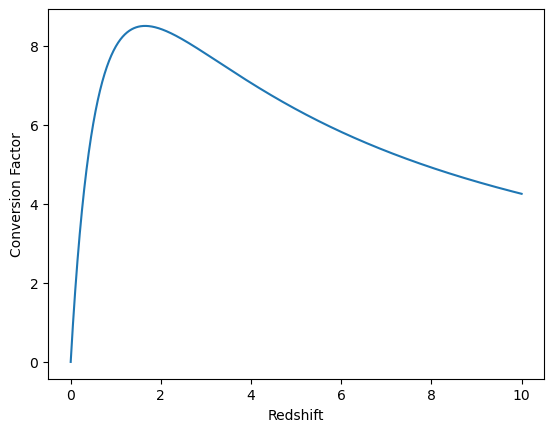

In [96]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

x = np.linspace(0, 10, 1000)
y = conversion_factor(72, 0.26, x)

df = pd.DataFrame({"x":x, "y":y})
seaborn.lineplot(x='x',y='y',data=df)
plt.xlabel("Redshift")
plt.ylabel("Conversion Factor")

**d.)** You’re writing a proposal to the ALMA telescope, to study a
        galaxy at a redshift of 0.5. If the telescope gives you
        $0.4^{\prime\prime}$ resolution, what’s the linear size (in kpc)
        corresponding to that resolution? You can stick with the
        cosmological parameters noted above, as they are fairly standard
        and will not surprise or shock any of your readers. [5 pts]

In [97]:
conversion_factor(72, 0.26, 0.5) * 0.4 # kpc/arcsecond * arcsecond


The conversion factor is 6.035953865591871 kpc/arcsec


2.414381546236749

The linear size would be 2.414 kpc, obtained simply by applying the conversion factor .